<a href="https://colab.research.google.com/github/Erkesto/Nayan_internship/blob/main/blur_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blur Detection Script

In [13]:
# importing required libraries
import cv2
from tqdm import trange
from google.colab.patches import cv2_imshow
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
cap = cv2.VideoCapture('/content/drive/MyDrive/blurring/test0.mp4')
#f = open('D:/CODING/internship/blurring/results.txt', 'w')

In [47]:
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("fps: ",cv2.CAP_PROP_FPS)
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Calculate the duration of the video in seconds
duration = frame_count / fps
print(duration, "Seconds")

fps:  5
1.793103448275862 Seconds


In [41]:
def calc_blur():
  sum = 0.0
  count = 0
  t = time.time()
  for i in trange(frame_count, unit=' frames', leave=False, dynamic_ncols=True, desc='Calculating blur ratio'):
      ret, frame = cap.read()
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      imgray = cv2.resize(gray, None,fx=0.25, fy=0.25, interpolation = cv2.INTER_CUBIC)
      cv2_imshow(imgray)
      #print(cv2.Laplacian(gray, cv2.CV_64F))
      fm = cv2.Laplacian(gray, cv2.CV_64F).var()

      # Sample quality bar. Parameters adjusted manually to fit horizontal image size
      cv2.rectangle(frame, (0, 1080), (int(fm*1.6), 1040), (0,0,255), thickness=cv2.FILLED)
      print("\nBlur Score: ",fm,"\n")
      sum += fm
      count+=1

      k = cv2.waitKey(1) & 0xff # 0xff to only consider the last 8 bytes of the
      if k == 27:
          break
  # taking the average of all the cummulative frames' blur scores to give us a singular number which gives the overall insight on
  # how the blurring is affecting the video...

  # we will only use this avg score to see if the video is blurry or not
  avg = sum /count
  print(time.time()-t)
  return (avg)

Here, you can categorise the following blur scores in the following categories:

1. fm < 120 -> no information is retrievable from the image whatsoever, i.e. completely blur.
2. fm > 120 && fm < 640 -> somewhat information is retrievable form the image, but the whole image is still not completely clear.
3. fm > 640 -> The image has enough information and is considered not blur.

* fm score = Blur Score

Calculating blur ratio:   0%|          | 0/52 [00:00<?, ? frames/s]

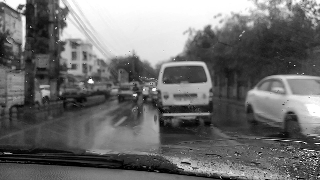


Blur Score:  214.47124356451624 



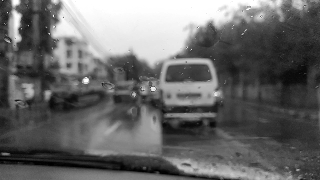


Blur Score:  60.25222026027987 



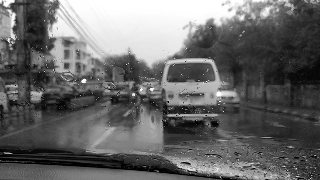

Calculating blur ratio:   6%|▌         | 3/52 [00:00<00:02, 23.04 frames/s]


Blur Score:  225.33788957134772 



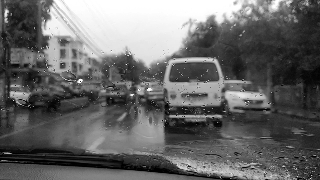


Blur Score:  244.38584837676163 



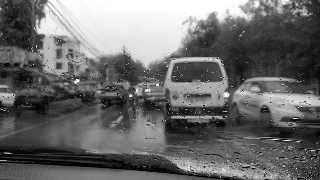


Blur Score:  324.57085015415134 



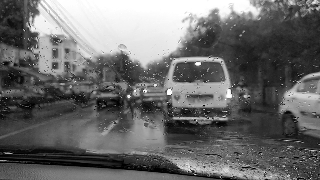

Calculating blur ratio:  12%|█▏        | 6/52 [00:00<00:02, 21.62 frames/s]


Blur Score:  374.886263017141 



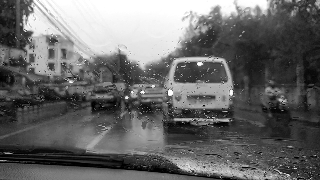


Blur Score:  338.0172567689578 



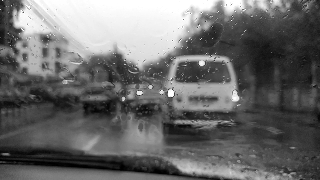


Blur Score:  116.13870645381671 



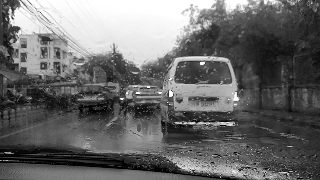

Calculating blur ratio:  17%|█▋        | 9/52 [00:00<00:02, 20.61 frames/s]


Blur Score:  292.4978536929613 



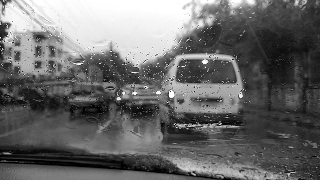


Blur Score:  401.76216021351274 



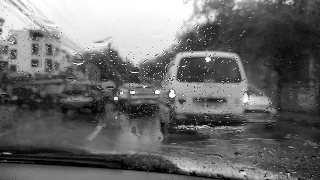


Blur Score:  324.86553463801164 



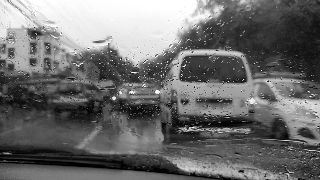

Calculating blur ratio:  23%|██▎       | 12/52 [00:00<00:02, 18.40 frames/s]


Blur Score:  418.34466113685204 



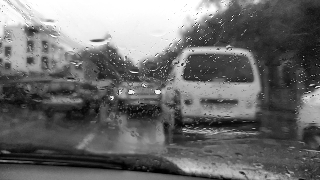


Blur Score:  215.27504624952982 



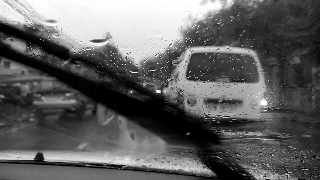


Blur Score:  

Calculating blur ratio:  27%|██▋       | 14/52 [00:00<00:02, 18.39 frames/s]

306.1650018663007 



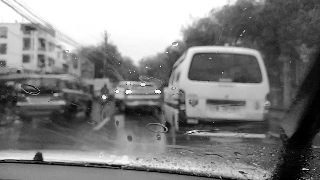


Blur Score:  119.13159786197873 



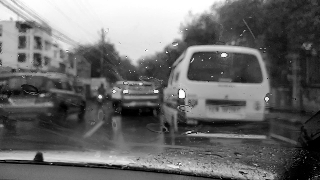

Calculating blur ratio:  31%|███       | 16/52 [00:00<00:01, 18.51 frames/s]


Blur Score:  116.10724240514963 



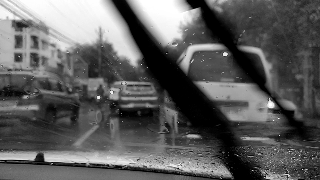


Blur Score:  176.98513157351334 



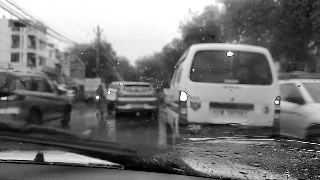

Calculating blur ratio:  35%|███▍      | 18/52 [00:00<00:01, 18.18 frames/s]


Blur Score:  193.51230624728737 



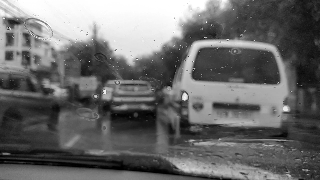


Blur Score:  103.3334634565942 



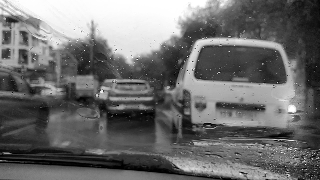

Calculating blur ratio:  38%|███▊      | 20/52 [00:01<00:01, 18.03 frames/s]


Blur Score:  220.60666298618904 



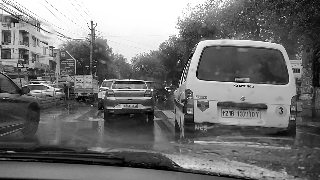


Blur Score:  713.7272037850825 



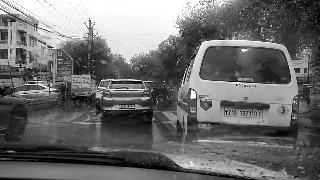

Calculating blur ratio:  42%|████▏     | 22/52 [00:01<00:01, 18.48 frames/s]


Blur Score:  561.6627041899491 



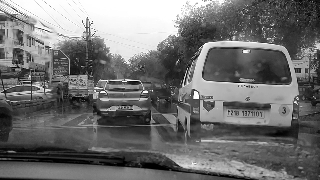


Blur Score:  604.2513543750326 



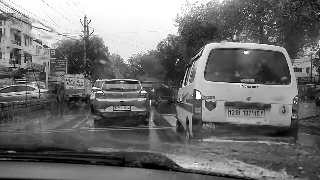

Calculating blur ratio:  46%|████▌     | 24/52 [00:01<00:01, 18.25 frames/s]


Blur Score:  649.6324640749606 



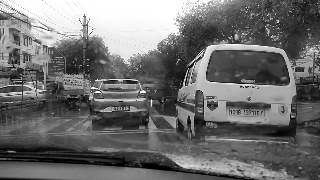


Blur Score:  557.7297620523899 



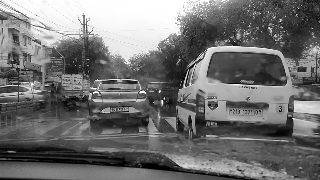

Calculating blur ratio:  50%|█████     | 26/52 [00:01<00:01, 18.58 frames/s]


Blur Score:  459.75559600191355 



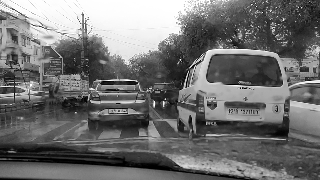


Blur Score:  531.565893547336 



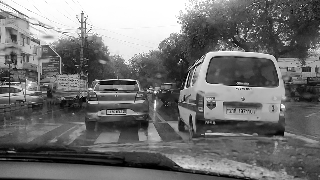

Calculating blur ratio:  54%|█████▍    | 28/52 [00:01<00:01, 18.85 frames/s]


Blur Score:  606.8815759837672 



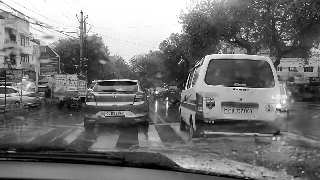


Blur Score:  523.4153661071354 



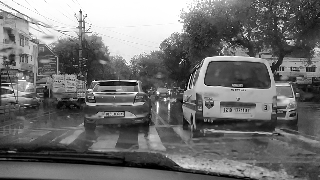

Calculating blur ratio:  58%|█████▊    | 30/52 [00:01<00:01, 17.81 frames/s]


Blur Score:  486.0665579540064 



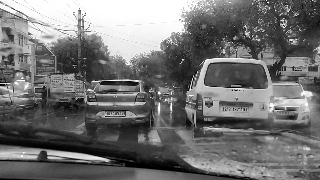


Blur Score:  502.3828744590428 



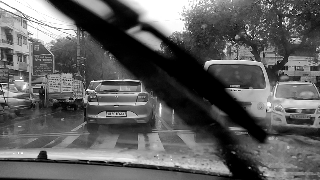

Calculating blur ratio:  62%|██████▏   | 32/52 [00:01<00:01, 17.73 frames/s]


Blur Score:  490.4669774881576 



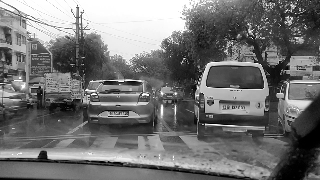


Blur Score:  688.726350869919 



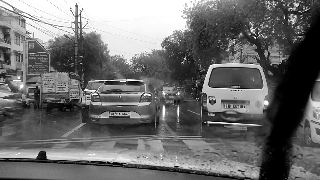

Calculating blur ratio:  65%|██████▌   | 34/52 [00:01<00:01, 17.86 frames/s]


Blur Score:  668.3735899553077 



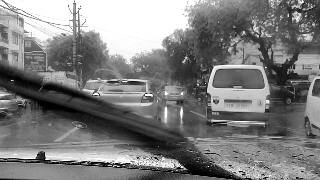


Blur Score:  425.00161685281336 



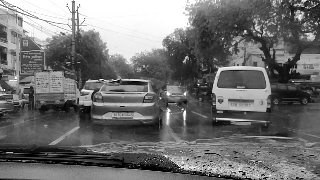

Calculating blur ratio:  69%|██████▉   | 36/52 [00:01<00:00, 17.75 frames/s]


Blur Score:  464.81420027768064 



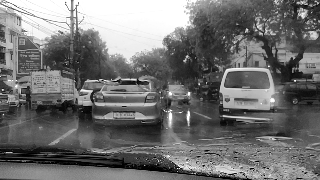


Blur Score:  325.9988817383084 



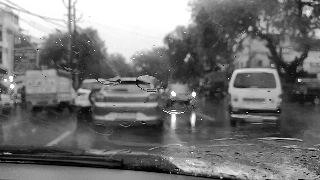

Calculating blur ratio:  73%|███████▎  | 38/52 [00:02<00:00, 17.71 frames/s]


Blur Score:  194.0610669166659 



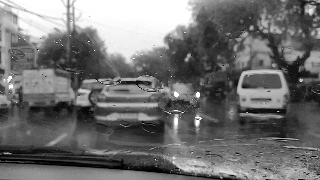


Blur Score:  210.9505403508504 



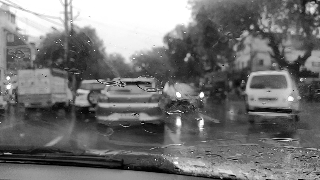


Blur Score:  237.25054974902 



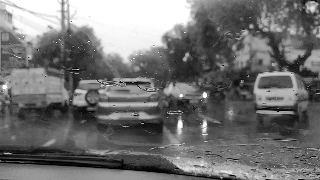

Calculating blur ratio:  79%|███████▉  | 41/52 [00:02<00:00, 17.71 frames/s]


Blur Score:  217.5492046213491 



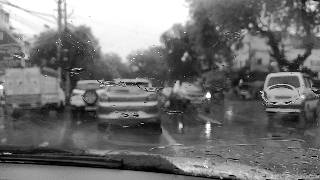


Blur Score:  216.9249315004879 



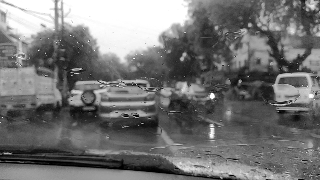

Calculating blur ratio:  83%|████████▎ | 43/52 [00:02<00:00, 17.48 frames/s]


Blur Score:  215.46699052851986 



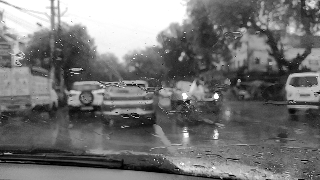


Blur Score:  242.05679473850475 



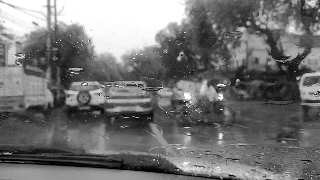

Calculating blur ratio:  87%|████████▋ | 45/52 [00:02<00:00, 17.20 frames/s]


Blur Score:  243.09688220891954 



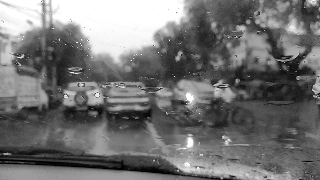


Blur Score:  159.0873162564831 



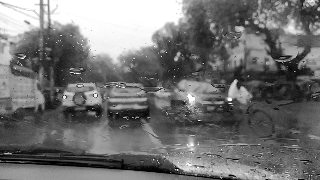

Calculating blur ratio:  90%|█████████ | 47/52 [00:02<00:00, 17.18 frames/s]


Blur Score:  269.4808311789606 



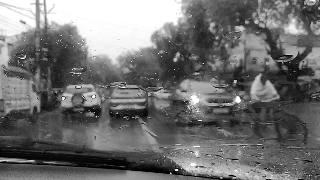


Blur Score:  305.808777058353 



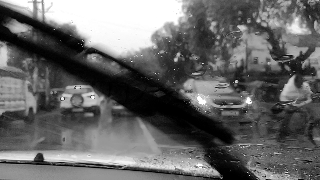

Calculating blur ratio:  94%|█████████▍| 49/52 [00:02<00:00, 17.60 frames/s]


Blur Score:  180.45080679728193 



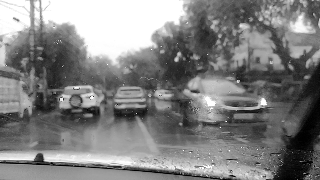


Blur Score:  164.8910478488498 



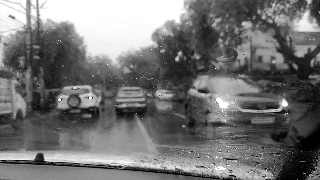

Calculating blur ratio:  98%|█████████▊| 51/52 [00:02<00:00, 17.19 frames/s]


Blur Score:  242.1647611686377 



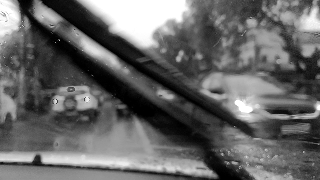


Blur Score:  88.86712848239476 

2.86250901222229
avgerage: 331.44629883871033


In [37]:
print("avgerage:",calc_blur())